In [1]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import ErdosRenyi
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [42]:
n = 1000 # number of vertices
p = 4 / n # avg deg 
T = 1000
TAIL = T - 100
I = 5

In [43]:
alphas = partition(.0, .15, 50)
bs = partition(0, 20, 50)

In [33]:
%%notify
def calc():
    pool = Pool(32)
    res = []
    timer = Timer()
    for i in range(I):
        local_timer = Timer()
        graph = ErdosRenyi(n, p)
        res.append(pool.map(fun, [(graph, b, alpha, T) for alpha in alphas for b in bs]))
        print(f'realzation {i} passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return res

<IPython.core.display.Javascript object>

In [34]:
mem = calc()

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 917, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 412, in _handle_workers
    pool._maintain_pool()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 248, in _maintain_pool
    self._repopulate_pool()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 241, in _repopulate_pool
    w.start()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 112, in start
    self._popen = self._Popen(self)
  File "/usr/lib/python3.7/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_obj)
  File "/usr/lib/python3.7/multiprocessing/popen_fork.py", line 20, in __init__
    self._launch(process_obj)
  File "/usr/lib/python3.7/multiprocessing/popen_fork.py", line 70, in _launch
    self.pid = os.fork

In [29]:
cur = np.array(cz)

In [63]:
cur.tofile('dump.dat')

In [40]:
print(cz)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



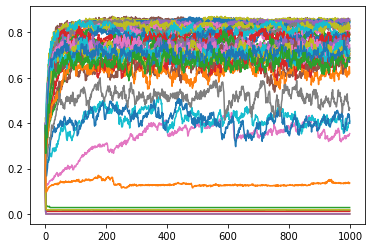

In [60]:
for c in [cur[0]]:
    for t in c:
        if random.uniform(0, 1) < .02:
            plt.plot(list(range(T)), t)

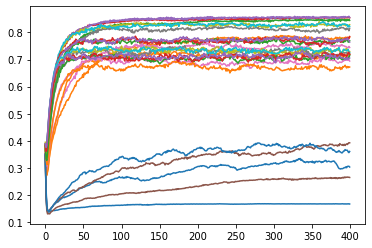

In [74]:
f = np.array(cz)
f = np.mean(f, axis=0)
for t in f:
    plt.plot(list(range(T)), t)

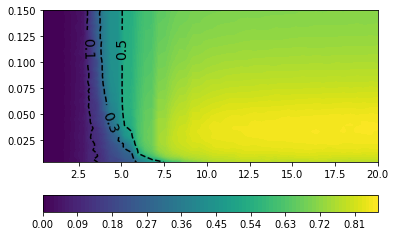

In [56]:
ts = []
for c in cur:
    ts.append(list(map(np.mean, map(lambda x:x[-TAIL:], c))))

ts = np.array(ts)
ts = np.mean(ts, axis=0)
ts.shape
draw_data(bs, alphas, ts, levels=[.1, .3, .5, .9])

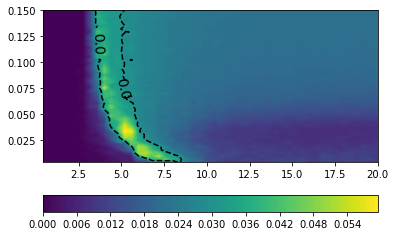

In [57]:
ts = []
for c in cz:
    ts.append(list(map(np.std, map(lambda x:x[-TAIL:], c))))

ts = np.array(ts)
ts = np.mean(ts, axis=0)
ts.shape
draw_data(bs, alphas, ts, levels=[.03])